In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
%matplotlib inline

import warnings
warnings.filterwarnings("ignore")

In [2]:
train = pd.read_csv("Train_SU63ISt.csv")
train.head(5)

,ID,Datetime,Count
0,0,25-08-2012 00:00,8
1,1,25-08-2012 01:00,2
2,2,25-08-2012 02:00,6
3,3,25-08-2012 03:00,2
4,4,25-08-2012 04:00,2


In [3]:
test=pd.read_csv("Test_0qrQsBZ.csv")
test.head()

,ID,Datetime
0,18288,26-09-2014 00:00
1,18289,26-09-2014 01:00
2,18290,26-09-2014 02:00
3,18291,26-09-2014 03:00
4,18292,26-09-2014 04:00


In [4]:
train.shape

(18288, 3)

In [5]:
test.shape

(5112, 2)

In [6]:
train_original=train.copy() 
test_original=test.copy()

In [7]:
train.Datetime=pd.to_datetime(train.Datetime, format='%d-%m-%Y %H:%M')
train.index=train.Datetime
train.head(5)

,ID,Datetime,Count
Datetime,,,
2012-08-25 00:00:00,0,2012-08-25 00:00:00,8
2012-08-25 01:00:00,1,2012-08-25 01:00:00,2
2012-08-25 02:00:00,2,2012-08-25 02:00:00,6
2012-08-25 03:00:00,3,2012-08-25 03:00:00,2
2012-08-25 04:00:00,4,2012-08-25 04:00:00,2


In [8]:
train_original.Datetime=pd.to_datetime(train_original.Datetime, format='%d-%m-%Y %H:%M')
test_original.Datetime=pd.to_datetime(test_original.Datetime, format='%d-%m-%Y %H:%M')

In [9]:
test.Datetime=pd.to_datetime(test.Datetime, format='%d-%m-%Y %H:%M')
test.index=test.Datetime
test.head(5)

,ID,Datetime
Datetime,,
2014-09-26 00:00:00,18288,2014-09-26 00:00:00
2014-09-26 01:00:00,18289,2014-09-26 01:00:00
2014-09-26 02:00:00,18290,2014-09-26 02:00:00
2014-09-26 03:00:00,18291,2014-09-26 03:00:00
2014-09-26 04:00:00,18292,2014-09-26 04:00:00


In [10]:
for i in (train, test, train_original, test_original):
    i['year']=i.Datetime.dt.year 
    i['month']=i.Datetime.dt.month 
    i['day']=i.Datetime.dt.day
    i['Hour']=i.Datetime.dt.hour

In [11]:
train['day of week']=train['Datetime'].dt.dayofweek 
temp = train['Datetime']

In [12]:
def applyer(row):
    if row.dayofweek == 5 or row.dayofweek == 6:
        return 1
    else:
        return 0 
temp2 = train['Datetime'].apply(applyer) 
train['weekend']=temp2

In [13]:
train.drop(['ID','Datetime'],axis=1,inplace=True)

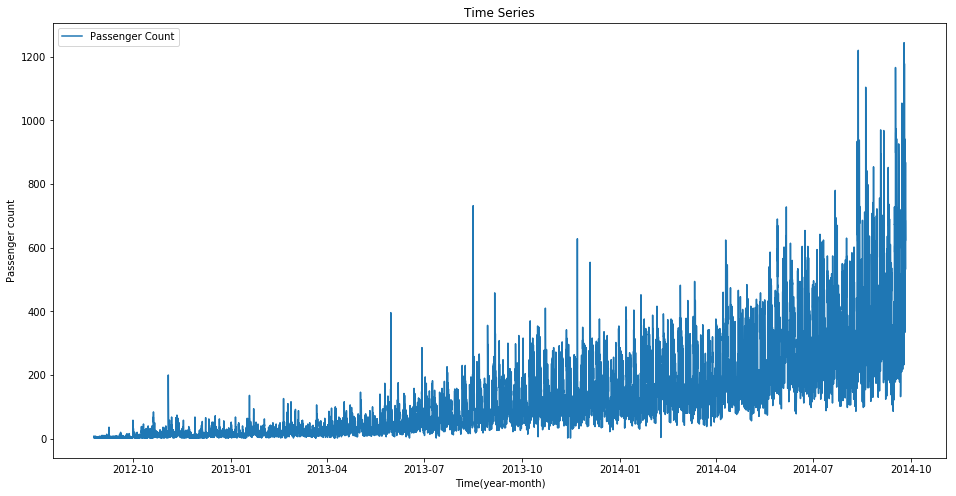

In [14]:
ts = train['Count'] 
plt.figure(figsize=(16,8)) 
plt.plot(ts, label='Passenger Count') 
plt.title('Time Series') 
plt.xlabel("Time(year-month)") 
plt.ylabel("Passenger count") 
plt.legend(loc='best')

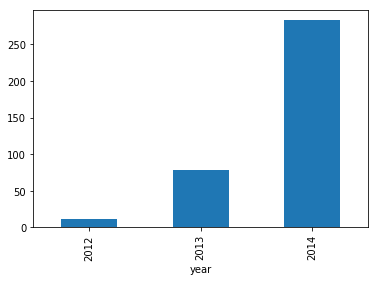

In [15]:
train.groupby('year')['Count'].mean().plot.bar()

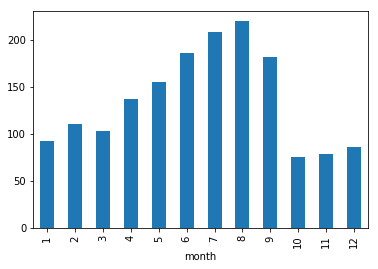

In [16]:
train.groupby('month')['Count'].mean().plot.bar()

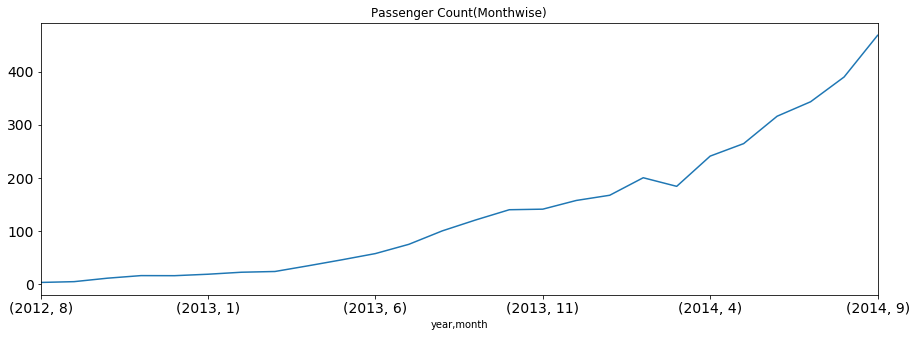

In [17]:
temp=train.groupby(['year', 'month'])['Count'].mean() 
temp.plot(figsize=(15,5), title= 'Passenger Count(Monthwise)', fontsize=14)

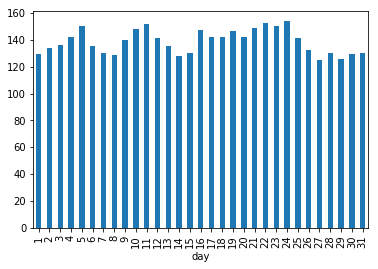

In [18]:
train.groupby('day')['Count'].mean().plot.bar()

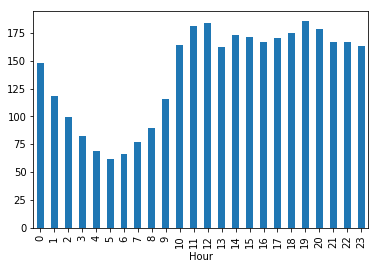

In [19]:
train.groupby('Hour')['Count'].mean().plot.bar()

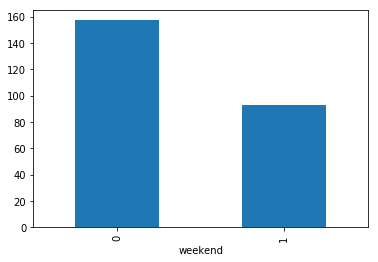

In [20]:
train.groupby('weekend')['Count'].mean().plot.bar()

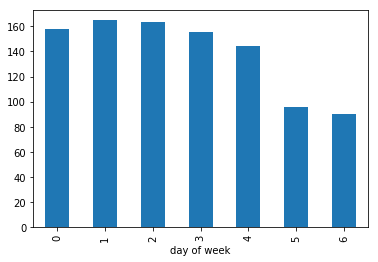

In [21]:
train.groupby('day of week')['Count'].mean().plot.bar()

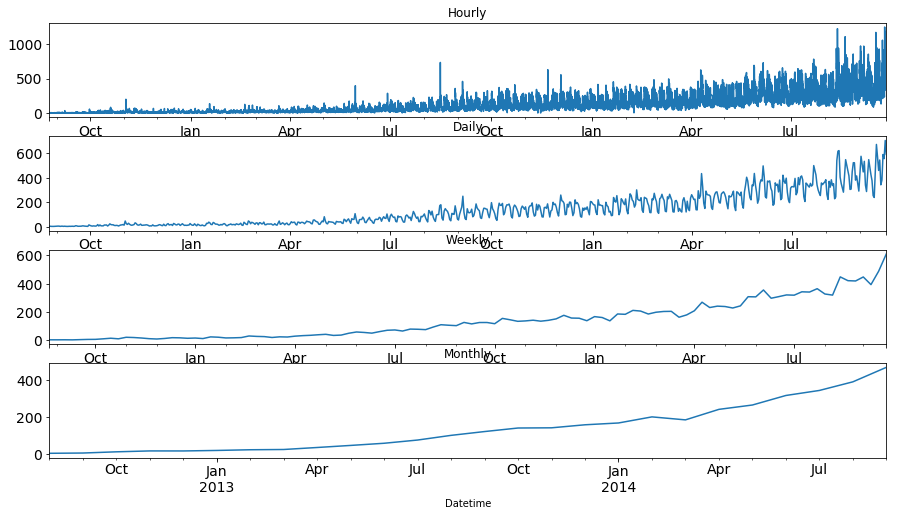

In [22]:
# Hourly time series 
hourly = train.resample('H').mean() 
# Converting to daily mean 
daily = train.resample('D').mean() 
# Converting to weekly mean 
weekly = train.resample('W').mean() 
# Converting to monthly mean 
monthly = train.resample('M').mean()

# Let’s look at the hourly, daily, weekly and monthly time series.

fig, axs = plt.subplots(4,1) 
hourly.Count.plot(figsize=(15,8), title= 'Hourly', fontsize=14, ax=axs[0]) 
daily.Count.plot(figsize=(15,8), title= 'Daily', fontsize=14, ax=axs[1]) 
weekly.Count.plot(figsize=(15,8), title= 'Weekly', fontsize=14, ax=axs[2]) 
monthly.Count.plot(figsize=(15,8), title= 'Monthly', fontsize=14, ax=axs[3]) 

plt.show()

In [23]:
# # Converting to daily mean 
# test = test.resample('D').mean() 

In [24]:
monthly=train.resample('D').mean()

In [25]:
monthly.head()

,Count,year,month,day,Hour,day of week,weekend
Datetime,,,,,,,
2012-08-25,3.166667,2012.0,8.0,25.0,11.5,5.0,1.0
2012-08-26,3.666667,2012.0,8.0,26.0,11.5,6.0,1.0
2012-08-27,2.583333,2012.0,8.0,27.0,11.5,0.0,0.0
2012-08-28,2.416667,2012.0,8.0,28.0,11.5,1.0,0.0
2012-08-29,2.500000,2012.0,8.0,29.0,11.5,2.0,0.0


In [26]:
monthly.shape

(762, 7)

In [27]:
# train.drop(['year','month','day','Hour','day of week', 'weekend'],axis=1,inplace=True)

### Plot time series data

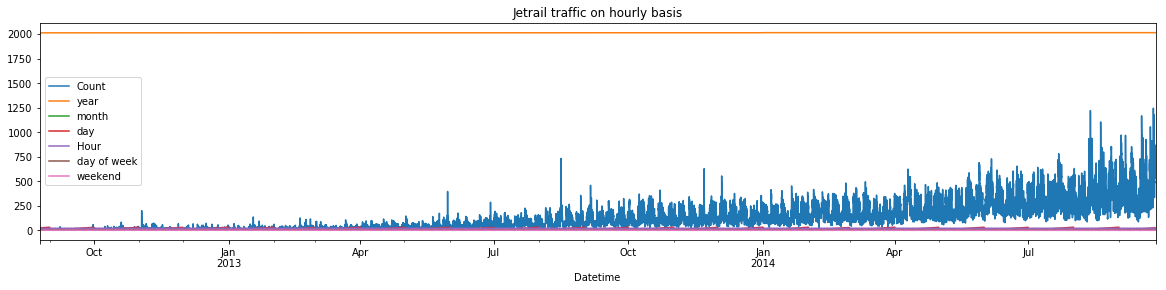

In [28]:
train.plot(figsize=(20, 4))
plt.legend(loc='best')
plt.title('Jetrail traffic on hourly basis')
plt.show(block=False)

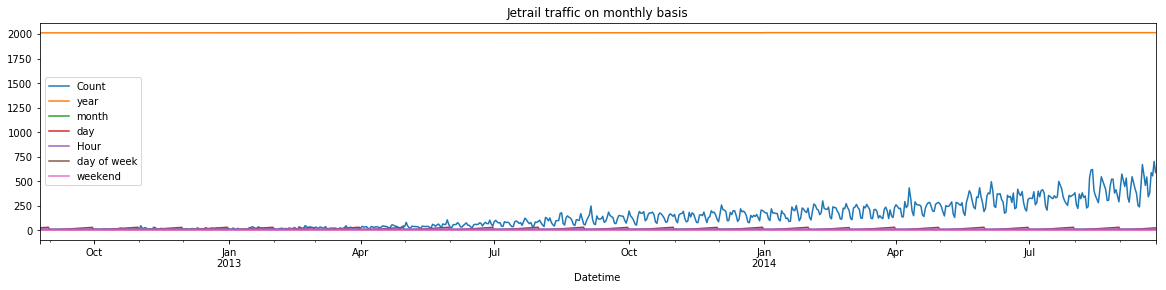

In [29]:
monthly.plot(figsize=(20, 4))
plt.legend(loc='best')
plt.title('Jetrail traffic on monthly basis')
plt.show(block=False)

### Outlier detection

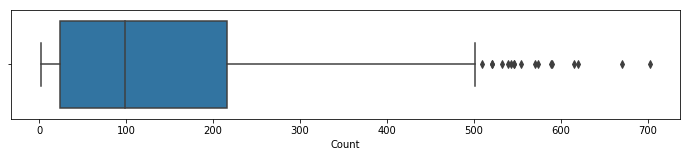

In [30]:
import seaborn as sns
fig = plt.subplots(figsize=(12, 2))
ax = sns.boxplot(x=monthly['Count'],whis=1.5)

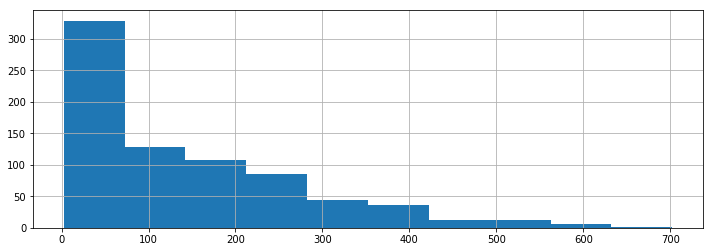

In [31]:
fig = monthly.Count.hist(figsize = (12,4))

### Time Series Decomposition

#### Additive

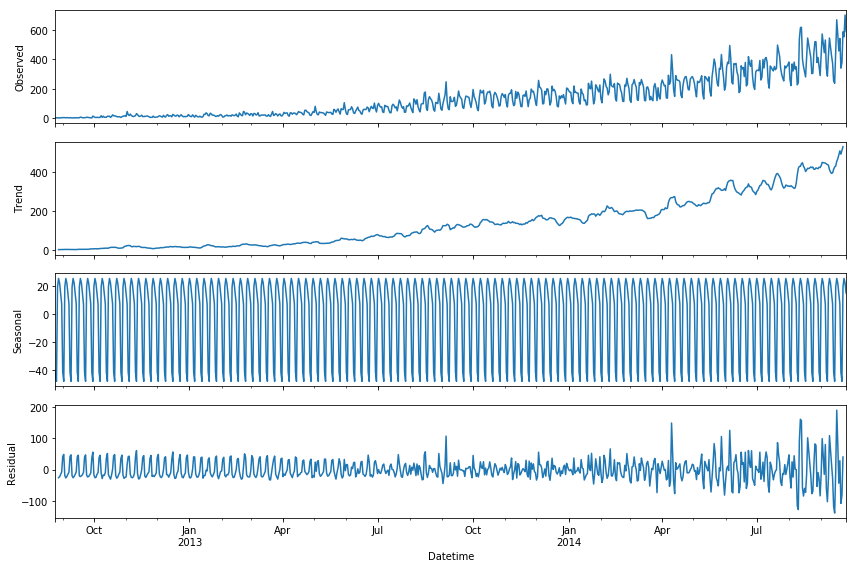

In [32]:
from pylab import rcParams
import statsmodels.api as sm
rcParams['figure.figsize'] = 12, 8
decomposition = sm.tsa.seasonal_decompose(monthly.Count, model='additive') # additive seasonal index
fig = decomposition.plot()
plt.show()

#### Multiplicative

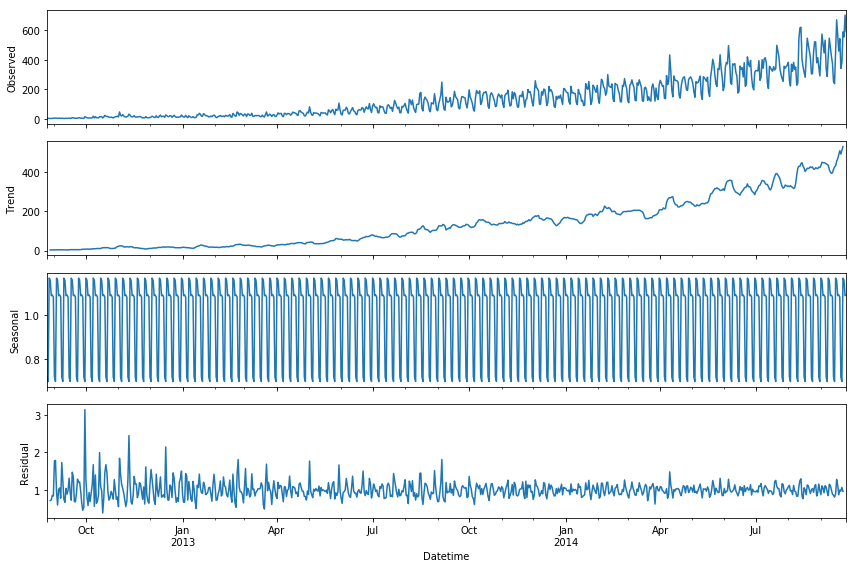

In [33]:
decomposition = sm.tsa.seasonal_decompose(monthly.Count, model='multiplicative') # multiplicative seasonal index
fig = decomposition.plot()
plt.show()

In [34]:
# train_len = 650
# train = monthly[0:train_len] # first 120 months as training set
# test = monthly[train_len:] # last 24 months as out-of-time test set
Train=monthly.ix['2012-08-25':'2014-06-24'] 
valid=monthly.ix['2014-06-25':'2014-09-25']

In [35]:
Train.shape

(669, 7)

In [36]:
Train.head()

,Count,year,month,day,Hour,day of week,weekend
Datetime,,,,,,,
2012-08-25,3.166667,2012.0,8.0,25.0,11.5,5.0,1.0
2012-08-26,3.666667,2012.0,8.0,26.0,11.5,6.0,1.0
2012-08-27,2.583333,2012.0,8.0,27.0,11.5,0.0,0.0
2012-08-28,2.416667,2012.0,8.0,28.0,11.5,1.0,0.0
2012-08-29,2.500000,2012.0,8.0,29.0,11.5,2.0,0.0


In [37]:
valid.shape

(93, 7)

### Holt's Winter additive forecast

In [38]:
from statsmodels.tsa.holtwinters import ExponentialSmoothing

y_hat_hwa = valid.copy()
model = ExponentialSmoothing(np.asarray(Train['Count']) ,seasonal_periods=4,trend='add', seasonal='add')
model_fit = model.fit(optimized=True)
print(model_fit.params)
y_hat_hwa['hw_forecast'] = model_fit.forecast(len(valid))

{'smoothing_level': 0.05263157894736842, 'smoothing_slope': 0.05263157894736842, 'smoothing_seasonal': 0.0, 'damping_slope': nan, 'initial_level': 104.1701388888889, 'initial_slope': 0.10416666666666671, 'initial_seasons': array([-101.00347222, -100.50347222, -101.58680556, -101.75347222]), 'use_boxcox': False, 'lamda': None, 'remove_bias': False}


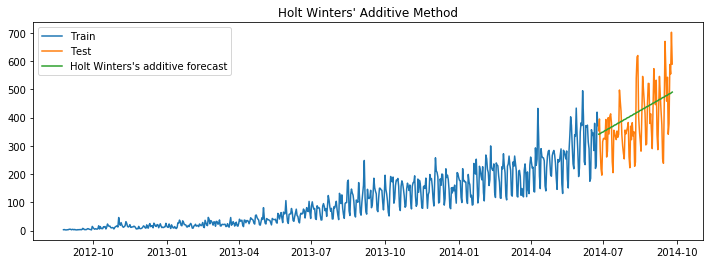

In [39]:
plt.figure(figsize=(12,4))
plt.plot(Train['Count'], label='Train')
plt.plot(valid['Count'], label='Test')
plt.plot(y_hat_hwa['hw_forecast'], label='Holt Winters\'s additive forecast')
plt.legend(loc='best')
plt.title('Holt Winters\' Additive Method')
plt.show()

In [40]:
from sklearn.metrics import mean_squared_error
rmse = np.sqrt(mean_squared_error(valid['Count'], y_hat_hwa['hw_forecast'])).round(2)
mape = np.round(np.mean(np.abs(valid['Count']-y_hat_hwa['hw_forecast'])/valid['Count'])*100,2)

tempResults = pd.DataFrame({'Method':['Holt Winters\' additive method'], 'RMSE': [rmse],'MAPE': [mape]})
# results = pd.concat([results, tempResults])
results = tempResults[['Method', 'RMSE', 'MAPE']]
results

,Method,RMSE,MAPE
0,Holt Winters' additive method,99.03,23.92


### Autoregressive Methods

In [41]:
from statsmodels.tsa.stattools import adfuller
adf_test = adfuller(monthly['Count'])

print('ADF Statistic: %f' % adf_test[0])
print('Critical Values @ 0.05: %.2f' % adf_test[4]['5%'])
print('p-value: %f' % adf_test[1])

ADF Statistic: 2.986351
Critical Values @ 0.05: -2.87
p-value: 1.000000


### Boxcox transformation to make the variance constant

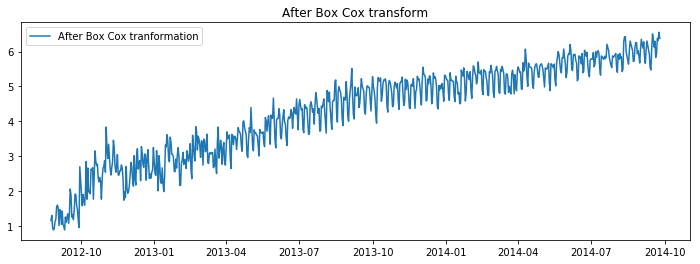

In [45]:
from scipy.stats import boxcox
data_boxcox = pd.Series(boxcox(monthly['Count'], lmbda=0), index = monthly.index)

plt.figure(figsize=(12,4))
plt.plot(data_boxcox, label='After Box Cox tranformation')
plt.legend(loc='best')
plt.title('After Box Cox transform')
plt.show()

### differencing to remove trend

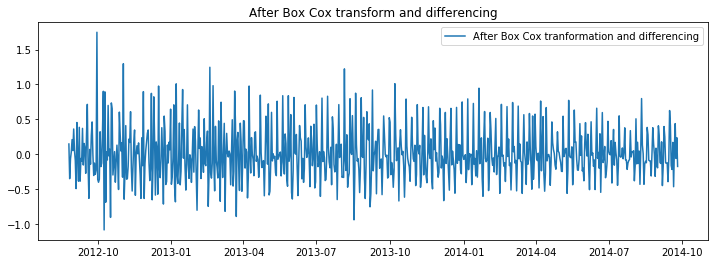

In [46]:
data_boxcox_diff = pd.Series(data_boxcox - data_boxcox.shift(), monthly.index)
plt.figure(figsize=(12,4))
plt.plot(data_boxcox_diff, label='After Box Cox tranformation and differencing')
plt.legend(loc='best')
plt.title('After Box Cox transform and differencing')
plt.show()

In [47]:
data_boxcox_diff.dropna(inplace=True)

In [48]:
data_boxcox_diff.tail()

Datetime
2014-09-21    0.106069
2014-09-22    0.438815
2014-09-23   -0.059244
2014-09-24    0.236642
2014-09-25   -0.174851
Freq: D, dtype: float64

In [49]:
data_boxcox_diff.head()

Datetime
2012-08-26    0.146603
2012-08-27   -0.350202
2012-08-28   -0.066691
2012-08-29    0.033902
2012-08-30    0.209721
Freq: D, dtype: float64

#### again a dickey fuller test

In [50]:
adf_test = adfuller(data_boxcox_diff)

print('ADF Statistic: %f' % adf_test[0])
print('Critical Values @ 0.05: %.2f' % adf_test[4]['5%'])
print('p-value: %f' % adf_test[1])

ADF Statistic: -8.877418
Critical Values @ 0.05: -2.87
p-value: 0.000000


### Auto correlation function

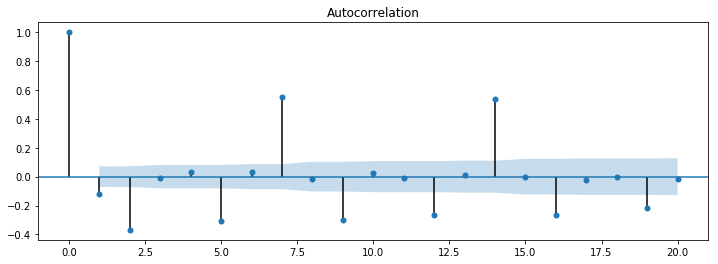

In [51]:
from statsmodels.graphics.tsaplots import plot_acf
plt.figure(figsize=(12,4))
plot_acf(data_boxcox_diff, ax=plt.gca(), lags = 20)
plt.show()

### partial auto correlation function

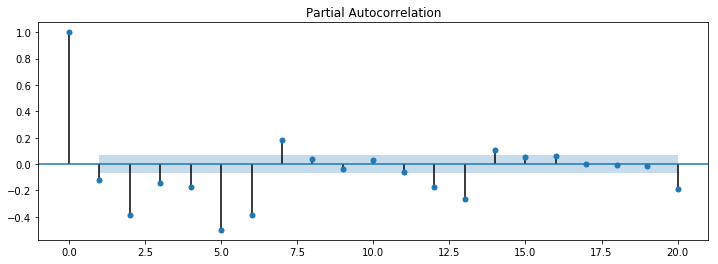

In [52]:
from statsmodels.graphics.tsaplots import plot_pacf
plt.figure(figsize=(12,4))
plot_pacf(data_boxcox_diff, ax=plt.gca(), lags = 20)
plt.show()

In [53]:
train_len = 669
train_data_boxcox = data_boxcox[:train_len]
test_data_boxcox = data_boxcox[train_len:]
train_data_boxcox_diff = data_boxcox_diff[:train_len-1]
test_data_boxcox_diff = data_boxcox_diff[train_len-1:]

In [54]:
train_data_boxcox_diff

Datetime
2012-08-26    0.146603
2012-08-27   -0.350202
2012-08-28   -0.066691
2012-08-29    0.033902
2012-08-30    0.209721
2012-08-31    0.052644
2012-09-01    0.361790
2012-09-02    0.052186
2012-09-03   -0.088553
2012-09-04   -0.492476
2012-09-05    0.454736
2012-09-06   -0.039221
2012-09-07   -0.385662
2012-09-08    0.385662
2012-09-09   -0.385662
2012-09-10   -0.060625
2012-09-11   -0.098440
2012-09-12    0.370374
2012-09-13   -0.154151
2012-09-14    0.154151
2012-09-15    0.090972
2012-09-16   -0.273293
2012-09-17    0.273293
2012-09-18    0.714653
2012-09-19   -0.173847
2012-09-20   -0.631778
2012-09-21    0.068993
2012-09-22   -0.143101
2012-09-23    0.268264
2012-09-24    0.462624
                ...   
2014-05-26    0.438537
2014-05-27   -0.017336
2014-05-28    0.262576
2014-05-29   -0.238389
2014-05-30   -0.199290
2014-05-31   -0.380772
2014-06-01    0.148660
2014-06-02    0.452872
2014-06-03    0.089217
2014-06-04   -0.026096
2014-06-05    0.286393
2014-06-06   -0.200147
20

### Auto Regressive Method

In [55]:
from statsmodels.tsa.arima_model import ARIMA
model = ARIMA(train_data_boxcox_diff, order=(1, 0, 0)) 
model_fit = model.fit()
print(model_fit.params)

const      0.007134
ar.L1.y   -0.127364
dtype: float64


In [56]:
y_hat_ar = data_boxcox_diff.copy()
y_hat_ar['ar_forecast_boxcox_diff'] = model_fit.predict(data_boxcox_diff.index.min(), data_boxcox_diff.index.max())
y_hat_ar['ar_forecast_boxcox'] = y_hat_ar['ar_forecast_boxcox_diff'].cumsum()
y_hat_ar['ar_forecast_boxcox'] = y_hat_ar['ar_forecast_boxcox'].add(data_boxcox[0])
y_hat_ar['ar_forecast'] = np.exp(y_hat_ar['ar_forecast_boxcox'])

### Plot train, test and forecast

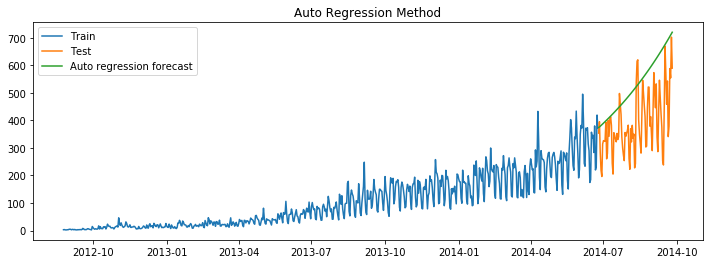

In [57]:
plt.figure(figsize=(12,4))
plt.plot(Train['Count'], label='Train')
plt.plot(valid['Count'], label='Test')
plt.plot(y_hat_ar['ar_forecast'][valid.index.min():], label='Auto regression forecast')
plt.legend(loc='best')
plt.title('Auto Regression Method')
plt.show()

In [58]:
rmse = np.sqrt(mean_squared_error(valid['Count'], y_hat_ar['ar_forecast'][valid.index.min():])).round(2)
mape = np.round(np.mean(np.abs(valid['Count']-y_hat_ar['ar_forecast'][valid.index.min():])/valid['Count'])*100,2)

tempResults = pd.DataFrame({'Method':['Autoregressive (AR) method'], 'RMSE': [rmse],'MAPE': [mape] })
results = pd.concat([results, tempResults])
results = results[['Method', 'RMSE', 'MAPE']]
results

,Method,RMSE,MAPE
0,Holt Winters' additive method,99.03,23.92
0,Autoregressive (AR) method,173.18,44.19


### Moving average Method

In [59]:
model = ARIMA(train_data_boxcox_diff, order=(0, 0, 1)) 
model_fit = model.fit()
print(model_fit.params)

const      0.006947
ma.L1.y   -0.854621
dtype: float64


In [60]:
y_hat_ma = data_boxcox_diff.copy()
y_hat_ma['ma_forecast_boxcox_diff'] = model_fit.predict(data_boxcox_diff.index.min(), data_boxcox_diff.index.max())
y_hat_ma['ma_forecast_boxcox'] = y_hat_ma['ma_forecast_boxcox_diff'].cumsum()
y_hat_ma['ma_forecast_boxcox'] = y_hat_ma['ma_forecast_boxcox'].add(data_boxcox[0])
y_hat_ma['ma_forecast'] = np.exp(y_hat_ma['ma_forecast_boxcox'])


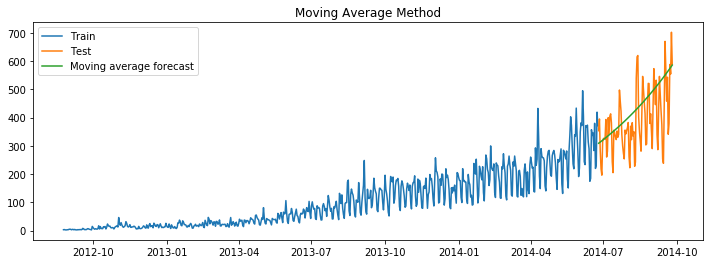

In [61]:
plt.figure(figsize=(12,4))
plt.plot(monthly['Count'][:train_len], label='Train')
plt.plot(monthly['Count'][train_len:], label='Test')
plt.plot(y_hat_ma['ma_forecast'][valid.index.min():], label='Moving average forecast')
plt.legend(loc='best')
plt.title('Moving Average Method')
plt.show()


In [62]:
rmse = np.sqrt(mean_squared_error(valid['Count'], y_hat_ma['ma_forecast'][valid.index.min():])).round(2)
mape = np.round(np.mean(np.abs(valid['Count']-y_hat_ma['ma_forecast'][valid.index.min():])/valid['Count'])*100,2)

tempResults = pd.DataFrame({'Method':['Moving Average (MA) method'], 'RMSE': [rmse],'MAPE': [mape] })
results = pd.concat([results, tempResults])
results = results[['Method', 'RMSE', 'MAPE']]
results

,Method,RMSE,MAPE
0,Holt Winters' additive method,99.03,23.92
0,Autoregressive (AR) method,173.18,44.19
0,Moving Average (MA) method,106.30,25.07


### Auto regressive moving average method

In [63]:
model = ARIMA(train_data_boxcox_diff, order=(1, 0, 1))
model_fit = model.fit()
print(model_fit.params)

const      0.006862
ar.L1.y    0.383383
ma.L1.y   -0.934232
dtype: float64


In [64]:
y_hat_arma = data_boxcox_diff.copy()
y_hat_arma['arma_forecast_boxcox_diff'] = model_fit.predict(data_boxcox_diff.index.min(), data_boxcox_diff.index.max())
y_hat_arma['arma_forecast_boxcox'] = y_hat_arma['arma_forecast_boxcox_diff'].cumsum()
y_hat_arma['arma_forecast_boxcox'] = y_hat_arma['arma_forecast_boxcox'].add(data_boxcox[0])
y_hat_arma['arma_forecast'] = np.exp(y_hat_arma['arma_forecast_boxcox'])

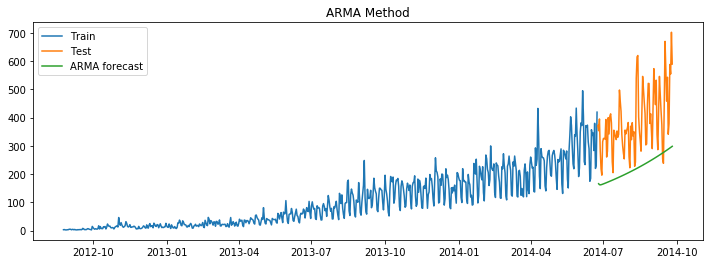

In [65]:
plt.figure(figsize=(12,4))
plt.plot(monthly['Count'][:train_len-1], label='Train')
plt.plot(monthly['Count'][train_len-1:], label='Test')
plt.plot(y_hat_arma['arma_forecast'][valid.index.min():], label='ARMA forecast')
plt.legend(loc='best')
plt.title('ARMA Method')
plt.show()

In [66]:
rmse = np.sqrt(mean_squared_error(valid['Count'], y_hat_arma['arma_forecast'][train_len-1:])).round(2)
mape = np.round(np.mean(np.abs(valid['Count']-y_hat_arma['arma_forecast'][train_len-1:])/valid['Count'])*100,2)

tempResults = pd.DataFrame({'Method':['Autoregressive moving average (ARMA) method'], 'RMSE': [rmse],'MAPE': [mape] })
results = pd.concat([results, tempResults])
results = results[['Method', 'RMSE', 'MAPE']]
results

,Method,RMSE,MAPE
0,Holt Winters' additive method,99.03,23.92
0,Autoregressive (AR) method,173.18,44.19
0,Moving Average (MA) method,106.30,25.07
0,Autoregressive moving average (ARMA) method,193.16,40.44


### Auto regressive integrated moving average

In [67]:
model = ARIMA(train_data_boxcox, order=(1, 1, 1))
model_fit = model.fit()
print(model_fit.params)

const        0.006862
ar.L1.D.y    0.383383
ma.L1.D.y   -0.934232
dtype: float64


In [68]:
y_hat_arima = data_boxcox_diff.copy()
y_hat_arima['arima_forecast_boxcox_diff'] = model_fit.predict(data_boxcox_diff.index.min(), data_boxcox_diff.index.max())
y_hat_arima['arima_forecast_boxcox'] = y_hat_arima['arima_forecast_boxcox_diff'].cumsum()
y_hat_arima['arima_forecast_boxcox'] = y_hat_arima['arima_forecast_boxcox'].add(data_boxcox[0])
y_hat_arima['arima_forecast'] = np.exp(y_hat_arima['arima_forecast_boxcox'])

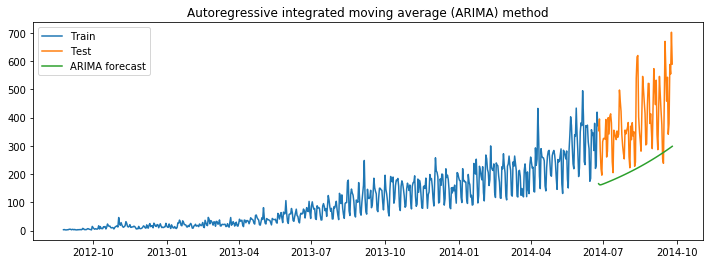

In [69]:
plt.figure(figsize=(12,4))
plt.plot(Train['Count'], label='Train')
plt.plot(valid['Count'], label='Test')
plt.plot(y_hat_arima['arima_forecast'][valid.index.min():], label='ARIMA forecast')
plt.legend(loc='best')
plt.title('Autoregressive integrated moving average (ARIMA) method')
plt.show()

In [70]:
rmse = np.sqrt(mean_squared_error(valid['Count'], y_hat_arima['arima_forecast'][valid.index.min():])).round(2)
mape = np.round(np.mean(np.abs(valid['Count']-y_hat_arima['arima_forecast'][valid.index.min():])/valid['Count'])*100,2)

tempResults = pd.DataFrame({'Method':['Autoregressive integrated moving average (ARIMA) method'], 'RMSE': [rmse],'MAPE': [mape] })
results = pd.concat([results, tempResults])
results = results[['Method', 'RMSE', 'MAPE']]
results

,Method,RMSE,MAPE
0,Holt Winters' additive method,99.03,23.92
0,Autoregressive (AR) method,173.18,44.19
0,Moving Average (MA) method,106.30,25.07
0,Autoregressive moving average (ARMA) method,193.16,40.44
0,Autoregressive integrated moving average (ARIM...,193.16,40.44


### Seasonal ARIMA

In [130]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

model = SARIMAX(train_data_boxcox, order=(2, 1, 4), seasonal_order=(0, 1, 1, 7)) 
model_fit = model.fit()
print(model_fit.params)

C:\Users\Ankita Paithankar\Anaconda3\lib\site-packages\statsmodels\base\model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ar.L1     -0.278697
ar.L2      0.553583
ma.L1     -0.187560
ma.L2     -0.965713
ma.L3      0.109130
ma.L4      0.149980
ma.S.L7   -0.872190
sigma2     0.060435
dtype: float64


In [131]:
y_hat_sarima = data_boxcox_diff.copy()
y_hat_sarima['sarima_forecast_boxcox'] = model_fit.predict(data_boxcox_diff.index.min(), data_boxcox_diff.index.max())
y_hat_sarima['sarima_forecast'] = np.exp(y_hat_sarima['sarima_forecast_boxcox'])

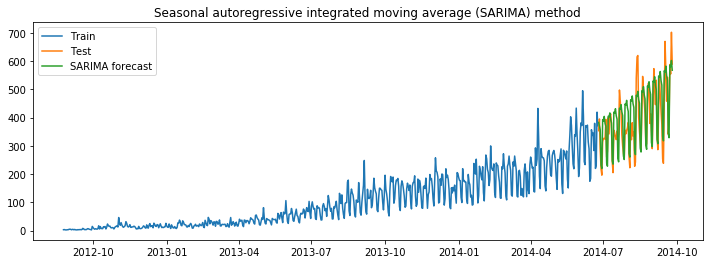

In [132]:
plt.figure(figsize=(12,4))
plt.plot(Train['Count'], label='Train')
plt.plot(valid['Count'], label='Test')
plt.plot(y_hat_sarima['sarima_forecast'][valid.index.min():], label='SARIMA forecast')
plt.legend(loc='best')
plt.title('Seasonal autoregressive integrated moving average (SARIMA) method')
plt.show()

In [133]:
rmse = np.sqrt(mean_squared_error(valid['Count'], y_hat_sarima['sarima_forecast'][valid.index.min():])).round(2)
mape = np.round(np.mean(np.abs(valid['Count']-y_hat_sarima['sarima_forecast'][valid.index.min():])/valid['Count'])*100,2)

tempResults = pd.DataFrame({'Method':['Seasonal autoregressive integrated moving average (SARIMA) method'], 'RMSE': [rmse],'MAPE': [mape] })
results = pd.concat([results, tempResults])
results = results[['Method', 'RMSE', 'MAPE']]
results

,Method,RMSE,MAPE
0,Holt Winters' additive method,99.03,23.92
0,Autoregressive (AR) method,173.18,44.19
0,Moving Average (MA) method,106.30,25.07
0,Autoregressive moving average (ARMA) method,193.16,40.44
0,Autoregressive integrated moving average (ARIM...,193.16,40.44
0,Seasonal autoregressive integrated moving aver...,69.26,15.23
0,Seasonal autoregressive integrated moving aver...,64.82,14.12
0,Seasonal autoregressive integrated moving aver...,65.66,14.33
0,Seasonal autoregressive integrated moving aver...,64.82,14.12
0,Seasonal autoregressive integrated moving aver...,66.08,14.44


In [134]:
# test.drop(['ID','year','month','day','Hour'],axis=1,inplace=True)

In [135]:

print(len(test))
test.head()


5112


,ID,Datetime,year,month,day,Hour,prediction
Datetime,,,,,,,
2014-09-26 00:00:00,18288,2014-09-26 00:00:00,2014,9,26,0,535.993357
2014-09-26 01:00:00,18289,2014-09-26 01:00:00,2014,9,26,1,NaN
2014-09-26 02:00:00,18290,2014-09-26 02:00:00,2014,9,26,2,NaN
2014-09-26 03:00:00,18291,2014-09-26 03:00:00,2014,9,26,3,NaN
2014-09-26 04:00:00,18292,2014-09-26 04:00:00,2014,9,26,4,NaN


In [136]:
test1=test.copy()
test1.drop(['ID','year','month','day','Hour','Datetime'],axis=1,inplace=True)
test1.head()

,prediction
Datetime,
2014-09-26 00:00:00,535.993357
2014-09-26 01:00:00,NaN
2014-09-26 02:00:00,NaN
2014-09-26 03:00:00,NaN
2014-09-26 04:00:00,NaN


In [137]:
predict=model_fit.predict(start="2014-9-26", end="2015-4-26", dynamic=True)
predict=np.exp(predict)

C:\Users\Ankita Paithankar\Anaconda3\lib\site-packages\statsmodels\tsa\statespace\kalman_filter.py:1740: ValueWarning: Dynamic prediction specified to begin during out-of-sample forecasting period, and so has no effect.
  ' effect.', ValueWarning)


In [138]:
test['prediction']=predict

In [139]:
test.head()

,ID,Datetime,year,month,day,Hour,prediction
Datetime,,,,,,,
2014-09-26 00:00:00,18288,2014-09-26 00:00:00,2014,9,26,0,550.837805
2014-09-26 01:00:00,18289,2014-09-26 01:00:00,2014,9,26,1,NaN
2014-09-26 02:00:00,18290,2014-09-26 02:00:00,2014,9,26,2,NaN
2014-09-26 03:00:00,18291,2014-09-26 03:00:00,2014,9,26,3,NaN
2014-09-26 04:00:00,18292,2014-09-26 04:00:00,2014,9,26,4,NaN


In [140]:
# Remember this is the daily predictions. 
# We have to convert these predictions to hourly basis. 
# To do so we will first calculate the ratio of passenger count for each hour of every day. 
# Then we will find the average ratio of passenger count for every hour and we will get 24 ratios. 
# Then to calculate the hourly predictions we will multiply the daily prediction with the hourly ratio.

# Calculating the hourly ratio of count 
train_original['ratio']=train_original['Count']/train_original['Count'].sum() 


# Grouping the hourly ratio 
temp=train_original.groupby(['Hour'])['ratio'].sum() 

In [141]:

# Groupby to csv format 
pd.DataFrame(temp, columns=['Hour','ratio']).to_csv('GROUPby.csv') 

In [142]:

temp2=pd.read_csv("GROUPby.csv") 
temp2=temp2.drop('Hour.1',1) 
temp2.head()

,Hour,ratio
0,0,0.044287
1,1,0.035343
2,2,0.029911
3,3,0.024714
4,4,0.020802


In [143]:
# Merge Test and test_original on day, month and year 
merge=pd.merge(test, test_original, on=('day','month','year','Hour'), how='left') 

for i in range(0,len(merge)+1):
        merge['prediction'].fillna(method ='pad', inplace=True) 
merge.head(50)
merge=merge.drop(['year', 'month','Datetime_x','Datetime_x','Datetime_y'], axis=1) 


In [144]:
# Predicting by merging merge and temp2 
prediction=pd.merge(merge, temp2, on='Hour', how='left') 

In [145]:
# Converting the ratio to the original scale 
prediction['Count']=prediction['prediction']*prediction['ratio']*24

In [146]:
prediction['ID']=prediction['ID_y'] 
submission=prediction.drop(['day','Hour','ratio','prediction', 'ID_x', 'ID_y'],axis=1) 

In [147]:
# Converting the final submission to csv format 
pd.DataFrame(submission, columns=['ID','Count']).to_csv('SARIMA.csv')

In [148]:
submission.head()

,Count,ID
0,585.473445,18288
1,467.238439,18289
2,395.427633,18290
3,326.727726,18291
4,275.007714,18292
